## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime as dt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
programming_df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

programming_df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
first_five_rows = programming_df.head()

print(first_five_rows)

last_five_rows = programming_df.tail()

last_five_rows

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124


,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
programming_df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
programming_df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [24]:
result = programming_df.groupby(by='TAG')['POSTS']

language_count = result.sum()

type(language_count)

language_count.sort_values(ascending=False)

TAG
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [23]:
months_count = programming_df.groupby(by='TAG')['DATE'].count()

months_count.sort_values()

TAG
go            129
swift         135
r             142
assembly      144
c             144
c++           144
delphi        144
java          144
javascript    144
perl          144
php           144
python        144
ruby          144
c#            145
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [30]:
programming_df.DATE = pd.to_datetime(programming_df.DATE)

programming_df.DATE.info()

programming_df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 1991 entries, 0 to 1990
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
1991 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.7 KB


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [31]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [32]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


## Data Manipulation



In [41]:
reshaped_df = programming_df.pivot(index='DATE', columns='TAG', values='POSTS')

reshaped_df.head(3)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [42]:
reshaped_df.shape

(145, 14)

In [43]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [44]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [45]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [47]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [50]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

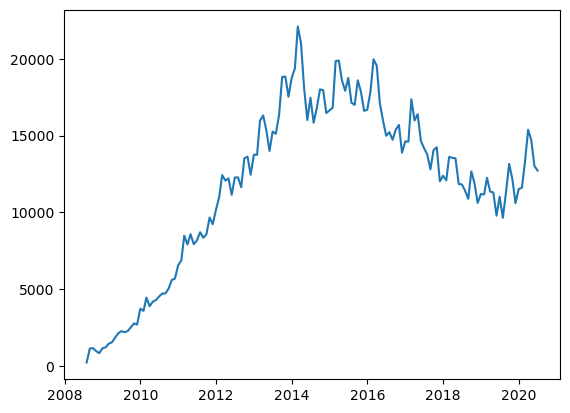

In [55]:
programming_df.head(3)

java = programming_df[programming_df['TAG'] == 'java']
x = java['DATE']
y = java['POSTS']

plt.plot(x, y)

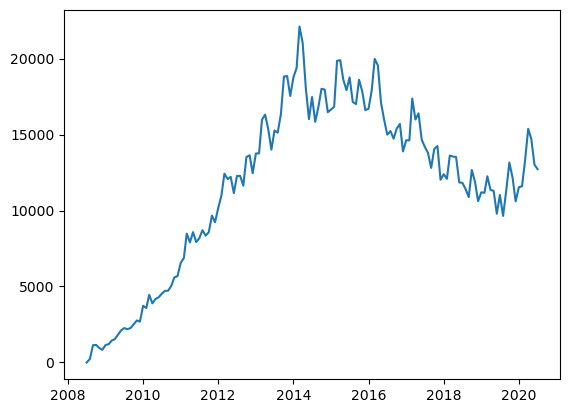

In [57]:
# another way


plt.plot(reshaped_df.index, reshaped_df.java)

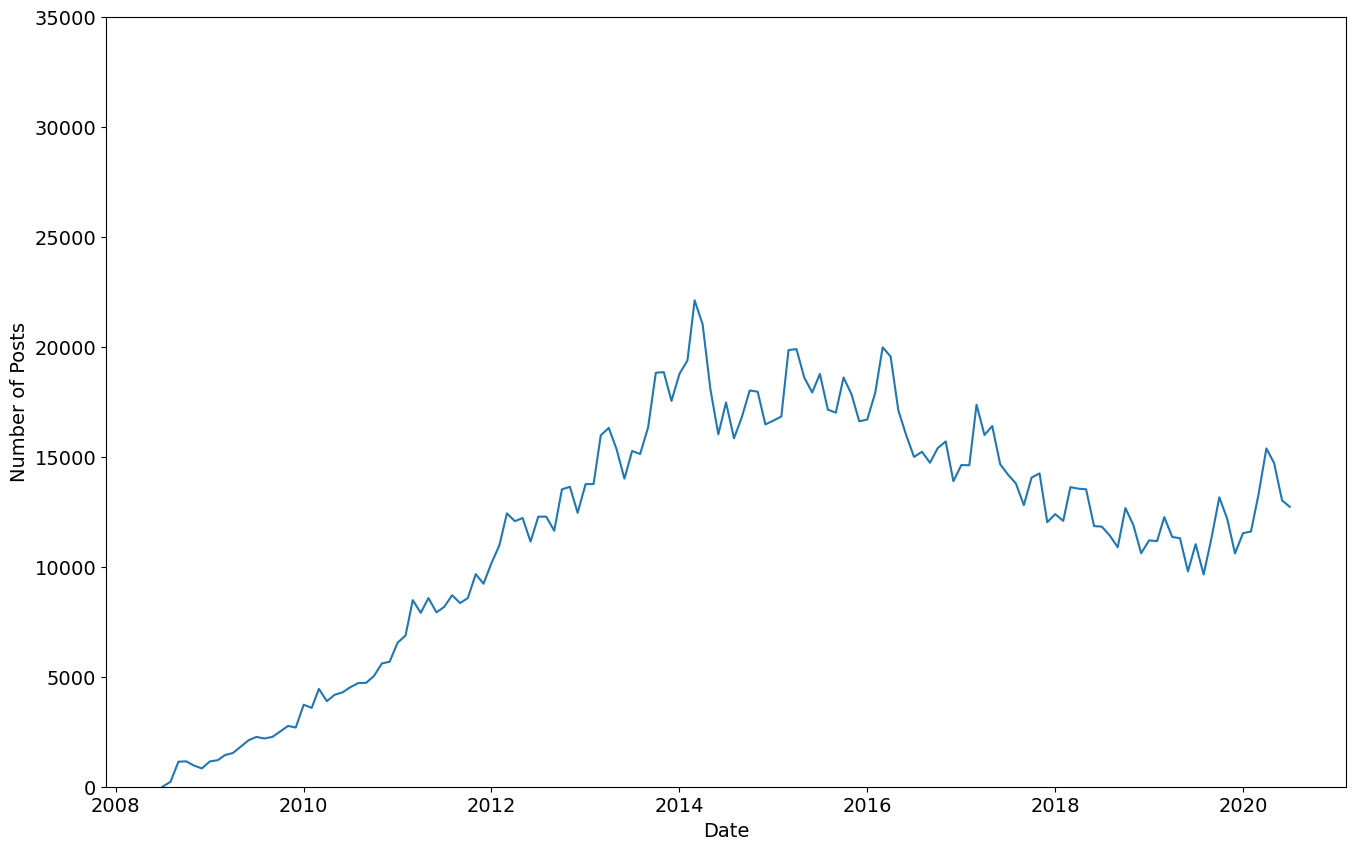

In [60]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

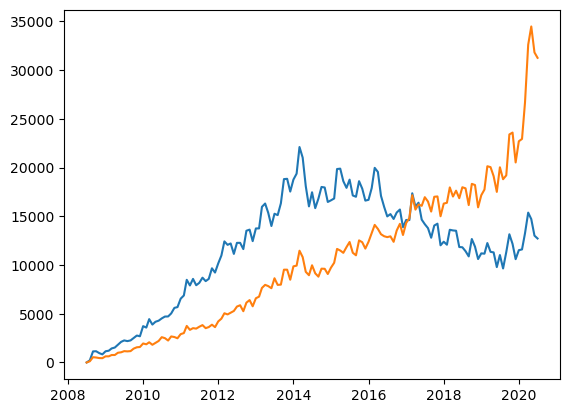

In [58]:
plt.plot(reshaped_df.index, reshaped_df['java'], reshaped_df['python'])

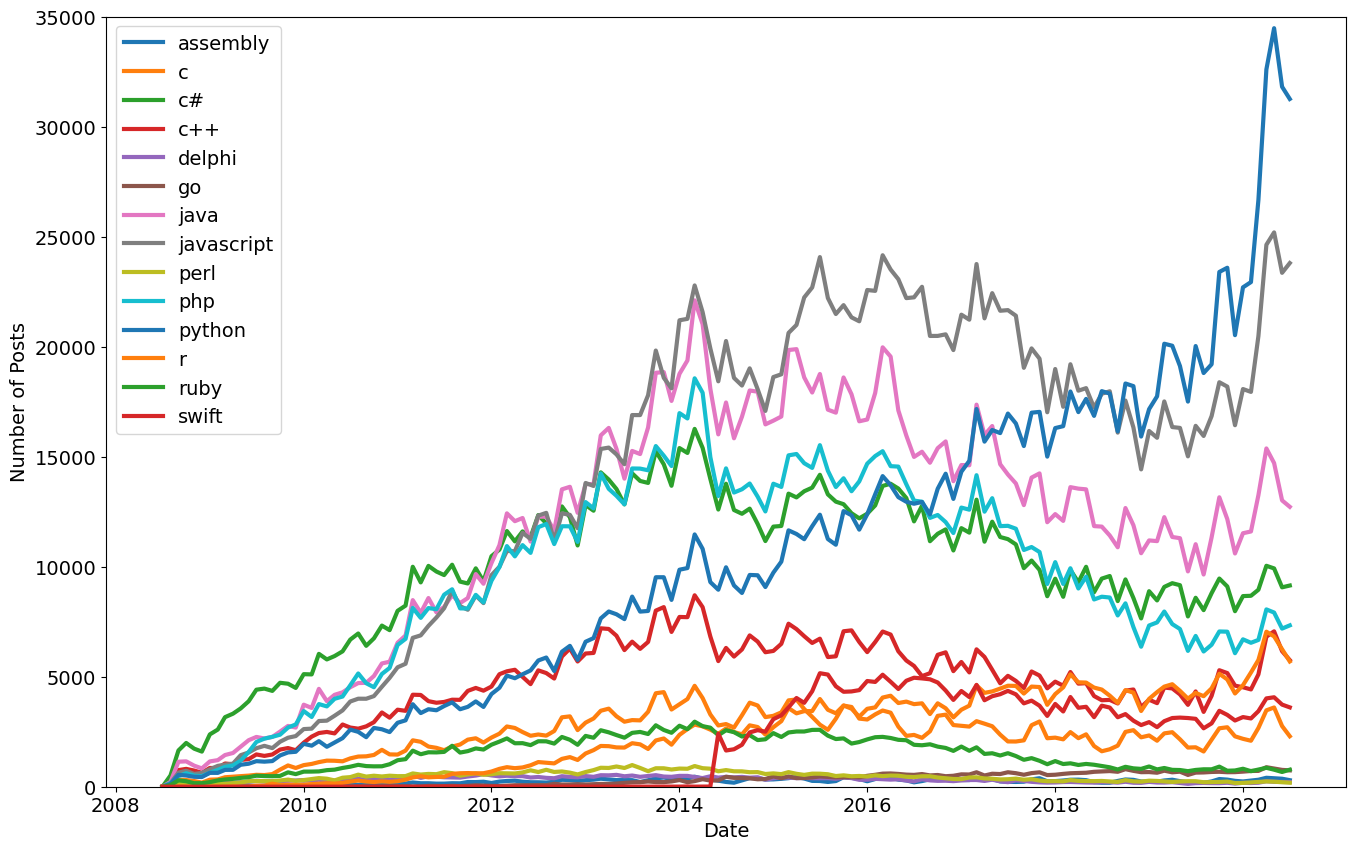

In [62]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
                linewidth=3, label=reshaped_df[column].name)
    
plt.legend(fontsize=14)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

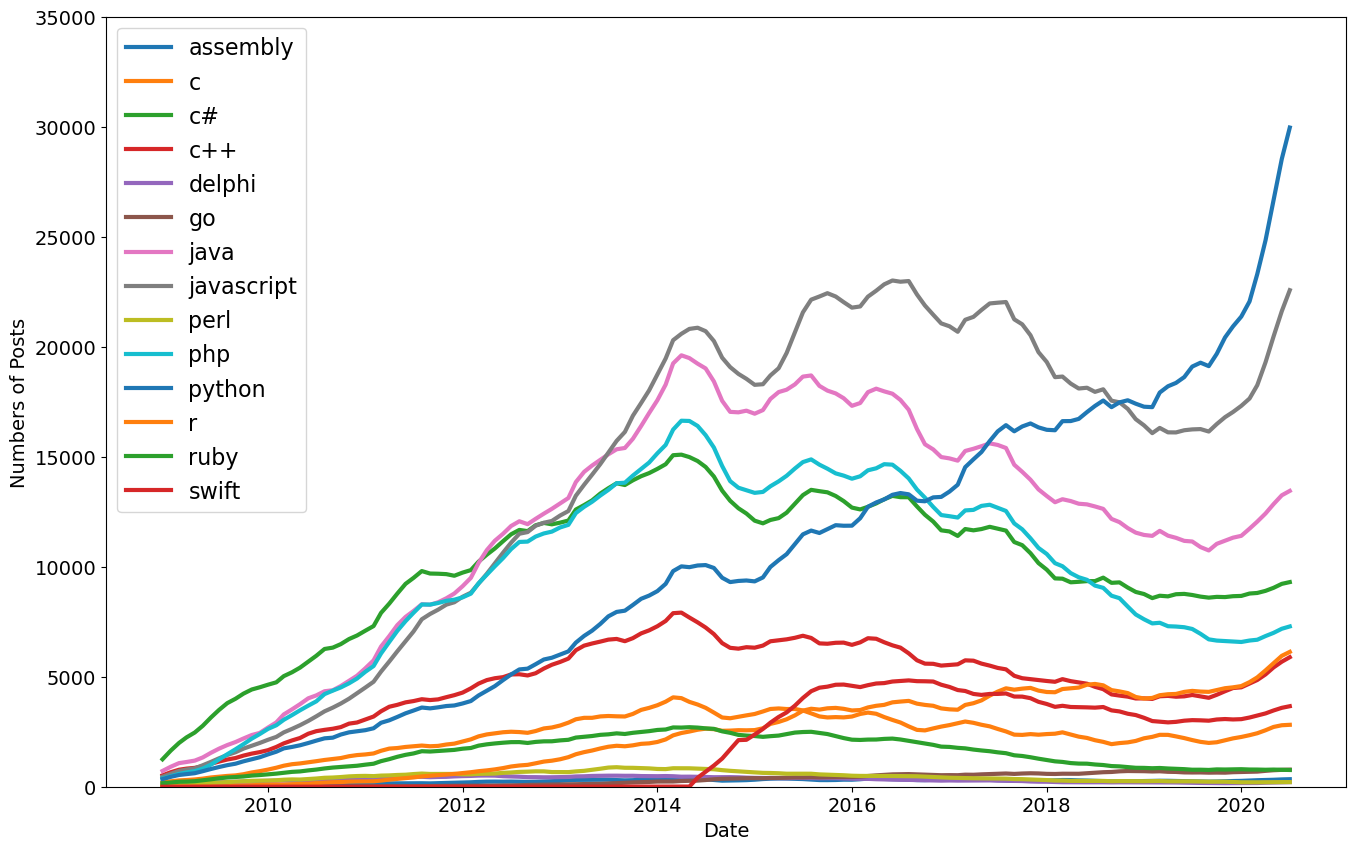

In [68]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Numbers of Posts", fontsize=14)
plt.ylim(0, 35000)

# plot of roll_df instead of reshaped_df
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    

plt.legend(fontsize=16)

# QUIZ

### Question 1:
Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts?

In [69]:
programming_df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


In [76]:
start_time = dt.datetime(year=2008, month=1, day=1)

end_time = dt.datetime(year=2012, month=12, day=31)

In [77]:
programming_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1991 non-null   datetime64[ns]
 1   TAG     1991 non-null   object        
 2   POSTS   1991 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 46.8+ KB


In [89]:
second_filter = programming_df['DATE'] <= end_time

In [90]:
first_filter = programming_df['DATE'] >= start_time

In [93]:
first_result = programming_df[first_filter].sort_values(by='DATE', ascending=True)
first_result

,DATE,TAG,POSTS
0,2008-07-01,c#,3
11,2008-08-01,php,161
10,2008-08-01,ruby,73
9,2008-08-01,delphi,14
7,2008-08-01,c++,164
...,...,...,...
1978,2020-07-01,java,12723
1977,2020-07-01,delphi,212
1989,2020-07-01,perl,182
1982,2020-07-01,assembly,298


In [95]:
second_result = first_result[second_filter]
second_result

/tmp/ipykernel_26296/3710074186.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  second_result = first_result[second_filter]


,DATE,TAG,POSTS
0,2008-07-01,c#,3
11,2008-08-01,php,161
10,2008-08-01,ruby,73
9,2008-08-01,delphi,14
7,2008-08-01,c++,164
...,...,...,...
706,2012-12-01,c#,10966
705,2012-12-01,assembly,264
704,2012-12-01,delphi,429
703,2012-12-01,java,12451


In [97]:
second_result.sort_values(by='DATE')

,DATE,TAG,POSTS
0,2008-07-01,c#,3
5,2008-08-01,perl,28
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
4,2008-08-01,python,124
...,...,...,...
713,2012-12-01,php,11127
714,2012-12-01,swift,3
715,2012-12-01,perl,558
710,2012-12-01,c++,5692


In [103]:
r = second_result.groupby(by="TAG")

r['POSTS'].mean().sort_values()

TAG
swift            3.227273
go              39.710526
assembly       130.169811
delphi         337.622642
r              408.117647
perl           429.528302
ruby          1121.566038
c             1449.358491
python        2800.320755
c++           3054.471698
javascript    5494.037736
php           5705.415094
java          6158.792453
c#            7042.500000
Name: POSTS, dtype: float64

In [126]:
answer1 = r['POSTS'].mean().sort_values().tail(1)

answer1

TAG
c#    7042.5
Name: POSTS, dtype: float64

### Question 2:
What was the most popular programming language from 2015 to 2018?

In [104]:
s1 = dt.datetime(year=2015, month=1, day=1)

e1 = dt.datetime(year=2018, month=12, day=31)

In [106]:
r2 = programming_df[programming_df['DATE'] >= s1][programming_df['DATE'] <= e1]
r2

/tmp/ipykernel_26296/4020310618.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r2 = programming_df[programming_df['DATE'] >= s1][programming_df['DATE'] <= e1]


,DATE,TAG,POSTS
1053,2015-01-01,javascript,18621
1054,2015-01-01,c,3222
1055,2015-01-01,c#,11823
1056,2015-01-01,assembly,333
1057,2015-01-01,java,16639
...,...,...,...
1720,2018-12-01,delphi,176
1721,2018-12-01,swift,2802
1722,2018-12-01,perl,232
1723,2018-12-01,go,661


In [110]:
r2.groupby(by='TAG')['POSTS'].mean().sort_values(ascending=False)

TAG
javascript    20413.916667
java          15287.625000
python        14477.604167
php           12062.166667
c#            11362.145833
c++            5537.562500
swift          4085.854167
r              3925.812500
c              2732.541667
ruby           1684.583333
go              556.000000
perl            404.041667
assembly        307.770833
delphi          286.375000
Name: POSTS, dtype: float64

In [124]:
answer2 = r2.groupby(by='TAG')['POSTS'].mean().sort_values(ascending=False).head(1)
answer2

TAG
javascript    20413.916667
Name: POSTS, dtype: float64

### Question 3:
What was the most popular programming language in 2020?

In [116]:
s2 = dt.datetime(year=2020, month=1, day=1)
e2 = dt.datetime(year=2020, month=12, day=31)

In [117]:
r3 = programming_df[programming_df['DATE'] >= s2][programming_df['DATE'] <= e2]
r3

/tmp/ipykernel_26296/3676867663.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r3 = programming_df[programming_df['DATE'] >= s2][programming_df['DATE'] <= e2]


,DATE,TAG,POSTS
1893,2020-01-01,assembly,239
1894,2020-01-01,c#,8665
1895,2020-01-01,c,2177
1896,2020-01-01,python,22699
1897,2020-01-01,java,11522
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


In [118]:
r3.groupby(by='TAG')['POSTS'].mean().sort_values(ascending=False)

TAG
python        28924.428571
javascript    21928.285714
java          13171.857143
c#             9210.285714
php            7201.857143
r              5912.857143
c++            5693.000000
swift          3589.142857
c              2723.142857
ruby            768.857143
go              763.142857
assembly        327.142857
perl            205.571429
delphi          203.428571
Name: POSTS, dtype: float64

In [120]:
answer3 = r3.groupby(by='TAG')['POSTS'].mean().sort_values(ascending=False).head(1)
answer3

TAG
python    28924.428571
Name: POSTS, dtype: float64